In [33]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",710)

In [34]:
df = pd.read_csv("../Documents/Boston_prices/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [35]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


C:\Users\grego\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: index 26 is out of bounds for axis 0 with size 26

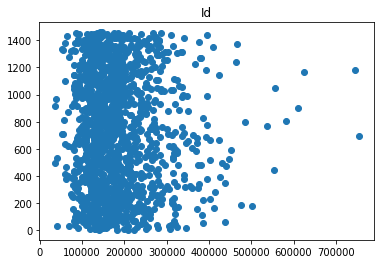

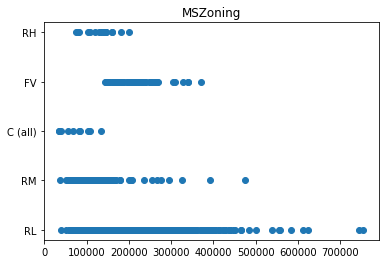

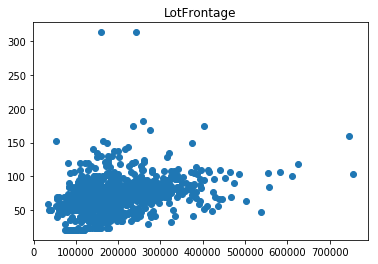

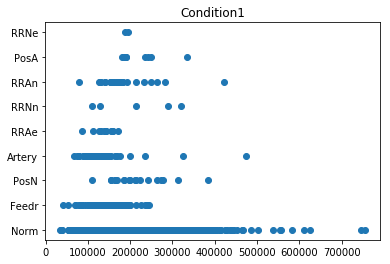

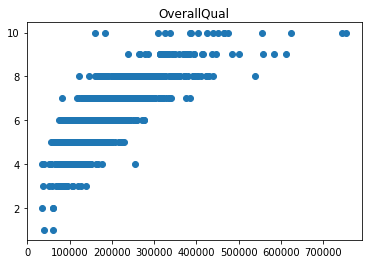

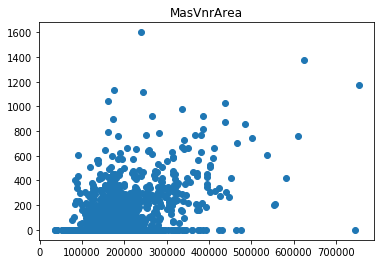

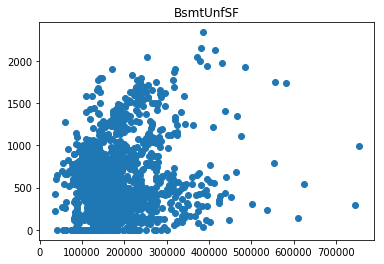

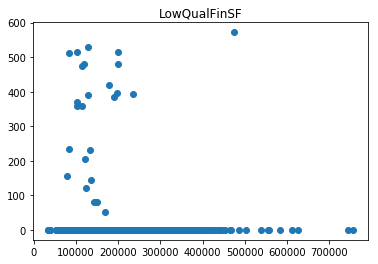

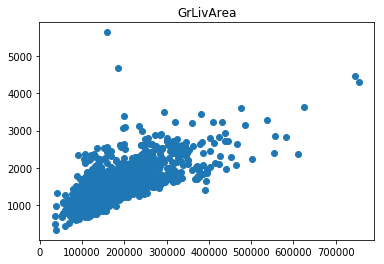

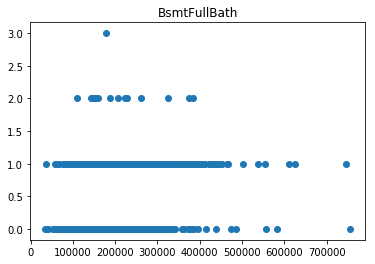

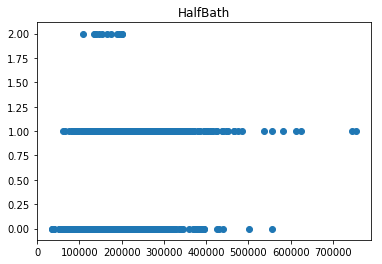

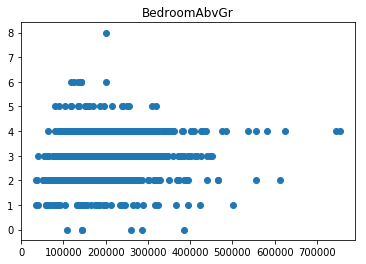

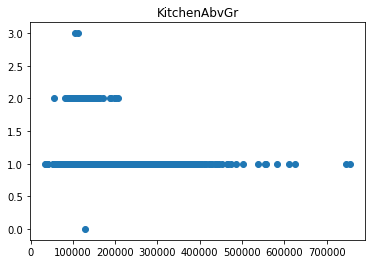

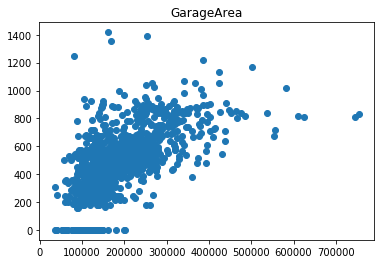

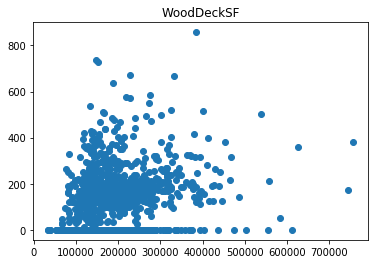

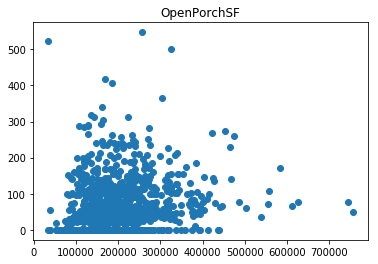

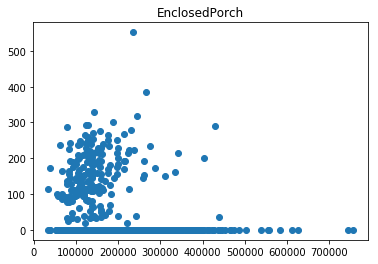

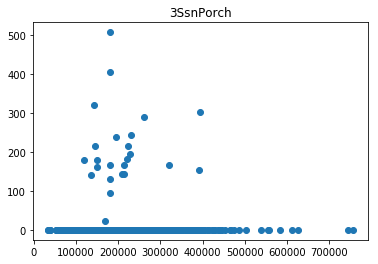

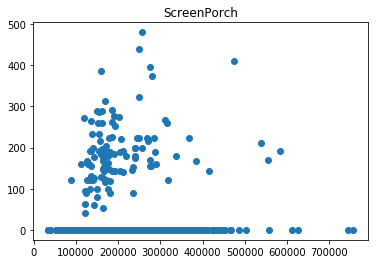

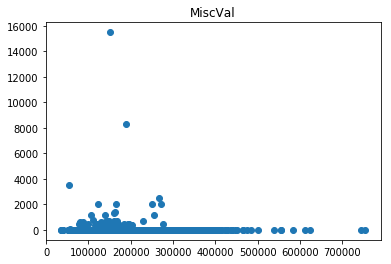

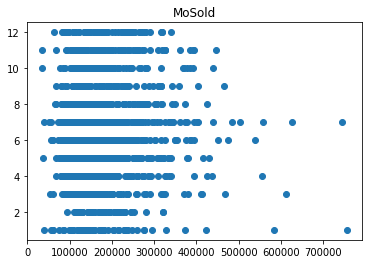

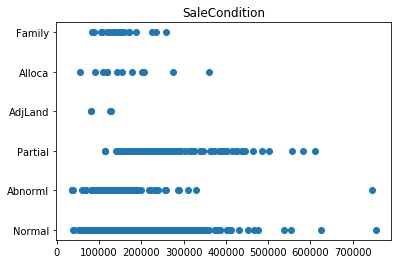

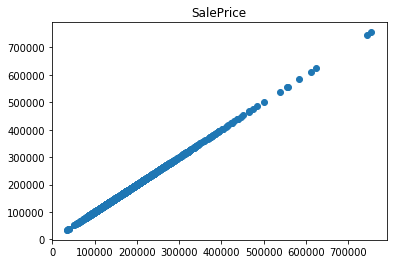

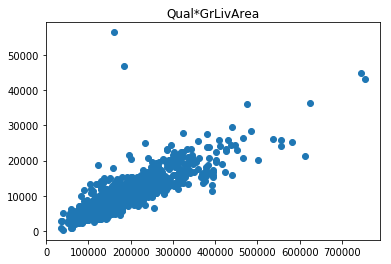

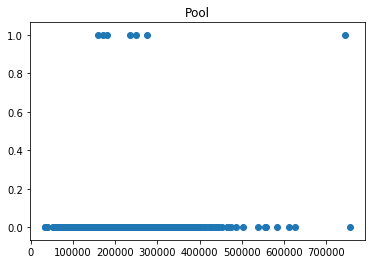

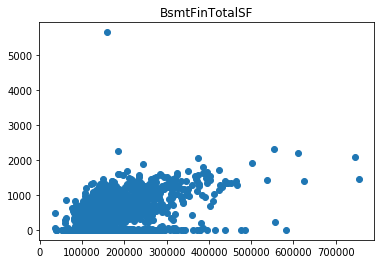

<Figure size 432x288 with 0 Axes>

In [315]:
non_plotable = []
for i in range(81):
    try:
        plt.figure()
        plt.scatter(df.loc[:,'SalePrice'], df.iloc[:,i])
        plt.title(df.columns[i])
    except:
        non_plotable.append(df.columns[i])
non_plotable 

In [319]:
for ele in non_plotable:
    plt.figure()
    plt.plot(df.groupby(ele)['SalePrice'].mean())
    plt.title(ele + ' vs AvgPrice')

In [36]:
#CLEANING
df[df['GrLivArea'] > 5000]
#df = df[df['GrLivArea'] < 5000] #probablement une donnée abérrante, on la suppr
to_be_replaced = ['Alley', 'Electrical' ,'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                  'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish' , 
                  'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for ele in to_be_replaced:
    df[ele] = df[ele].fillna("NA")
df = df[df['Electrical'] != "NA"]
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df

C:\Users\grego\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\grego\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\grego\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0000,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0000,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
7,8,60,RL,70.0475,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0000,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0000,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

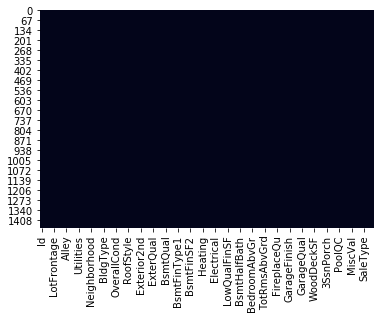

In [321]:
df.info()
sns.heatmap(df.isnull(), cbar=False)

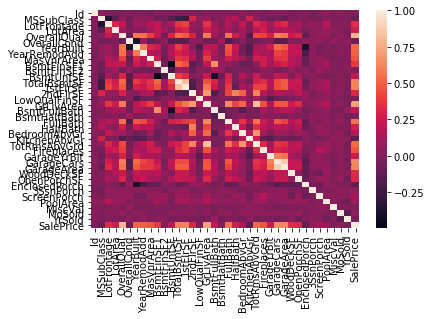

In [322]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [37]:
#feature engineering
df['Qual*GrLivArea'] = df['OverallQual'] * df['GrLivArea'] #creer une col plus précises comprenant la surface total du lot
df['Pool'] = np.where(df['PoolArea'] > 0, 1, 0)
df = df.drop(['PoolArea'], axis = 1)
df['BsmtFinTotalSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']#drop les 2 cols et eventuellement ajouter un ndicateur de 2 eme étage de bsmt

C:\Users\grego\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\grego\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
#encode and drop categoricals cols
#drop or remove created feature: Pool/PoolArea, OverallQual*grlivsf, BsmtFinTotalSF/1st 2st
categorical_features = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'MiscVal', 'YrSold', 'SaleType', 'SaleCondition', 'Utilities', 'Street']

numerical_features = ['BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr' , 
                      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LotFrontage', 
                      'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFinTotalSF','BsmtUnfSF', 'TotalBsmtSF', 
                      '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                      'Qual*GrLivArea', 'Pool']
def encode(df, features):
    for feature in features:
        to_encode = df.copy()
        encoded = pd.get_dummies(to_encode[feature], prefix = feature)
        df = pd.concat([df, encoded], axis=1, sort=False)
    df = df.drop(columns = features)
    return df
encoded_df = encode(df, categorical_features)
encoded_df

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,SalePrice,Qual*GrLivArea,Pool,BsmtFinTotalSF,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_NA,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemod

In [301]:
"""to_drop_features = ['MSSubClass', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'YrSold', 'Utilities', 'Street', 'SaleType', 'Neighborhood',  'BsmtFinSF1', 
                    'BsmtFinSF2', 'BsmtHalfBath', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea']

important_categorical = ['MSZoning', 'SaleCondition', 'Condition1']

numerical_features = ['BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr' , 
                      'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LotFrontage', 
                      'MasVnrArea', 'BsmtFinTotalSF','BsmtUnfSF', 
                      'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'Pool', 'OverallQual', 'MiscVal']
def encode(df, features):
    for feature in features:
        to_encode = df.copy()
        encoded = pd.get_dummies(to_encode[feature], prefix = feature)
        df = pd.concat([df, encoded], axis=1, sort=False)
    df = df.drop(columns = features)
    return df
df = df.drop(columns = to_drop_features)
encoded_df = encode(df, important_categorical)"""

In [39]:
#split clean dataset
train, test = train_test_split(encoded_df, test_size=0.3)
print(len(train))
print(len(test))

1021
438


In [40]:
all_features = list(encoded_df.columns)
all_features.remove('SalePrice')
all_features.remove('Id')
encoded_features = list(set(all_features).difference(set(numerical_features)))
print("nb_all_features {}".format(len(all_features)))
print("nb_encoded_features {}".format(len(encoded_features)))
print("nb_numerical_features {}".format(len(numerical_features)))

nb_all_features 649
nb_encoded_features 624
nb_numerical_features 25


In [41]:
def select_features_RFE(features, nb_params):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, nb_params, step=1)
    selector = selector.fit(train[features], train['SalePrice'])
    selected = selector.support_
    params = [features[i] for i in range(0, len(features)) if selected[i] == True]
    return params

def select_Kbest_features(features, nb_params):
    test = SelectKBest(score_func=chi2,k = nb_params)
    fit = test.fit(train[features], train['SalePrice'])
    selected = fit.get_support()
    params = [features[i] for i in range(0, len(features)) if selected[i] == True]
    return params

def train_evaluate(features):
    evaluation = {}
    reg = linear_model.Ridge(alpha = 0.01)
    reg.fit(train[features], train['SalePrice'])
    sales = test['SalePrice']
    sales_pred = reg.predict(test[features])
    evaluation['features'] = features
    evaluation['r2'] = metrics.r2_score(sales, sales_pred)
    evaluation['mean_absolute_error'] = metrics.mean_absolute_error(sales, sales_pred)
    evaluation['explained variance score'] = metrics.explained_variance_score(sales, sales_pred)
    evaluation['mean_squared_error'] = metrics.mean_squared_error(sales, sales_pred)
    #evaluation['mean_squared_log_error'] = metrics.mean_squared_log_error(sales, sales_pred)
    evaluation['median_absolute_error'] = metrics.median_absolute_error(sales, sales_pred)
    check = {'sales': sales, 'sales_pred': sales_pred}
    check = pd.DataFrame(data=check)
    check
    return evaluation, check

def get_best_model(params_max, select_params_meth):
    best_model = {}
    best_model['features'] = features
    best_model['r2'] = 0
    best_model['mean_absolute_error'] = 1000000
    best_model['explained variance score'] = 100000
    best_model['mean_squared_error'] = 10000000
    #best_model['mean_squared_log_error'] = metrics.mean_squared_log_error(sales, sales_pred)
    best_model['median_absolute_error'] = 651351351
    for i in range(1, params_max):
        if select_params_meth == 'RFE':
            params = select_features_RFE(features, i)
        elif select_params_meth == 'Kbest':
            params = select_Kbest_features(features, i)
        i_model, check = train_evaluate(params)
        if i_model['r2'] > best_model['r2']:
            best_model = i_model
            print(best_model['r2'])
            print(best_model['mean_absolute_error'])
            print(best_model['features'])
    return best_model, check

In [42]:
features = all_features
model, check_pred = get_best_model(len(features), 'Kbest')

0.08899428391521247
56165.85223937254
['LotArea']
0.7507872529461173
27969.28662801398
['LotArea', 'Qual*GrLivArea']
0.8012179803340924
25050.130580878213
['LotArea', '2ndFlrSF', 'Qual*GrLivArea']
0.8115975448126657
24042.156410131956
['LotArea', 'BsmtFinSF1', '2ndFlrSF', 'Qual*GrLivArea']
0.8116274975295119
24040.143550502846
['LotArea', 'BsmtFinSF1', '2ndFlrSF', 'Qual*GrLivArea', 'BsmtFinTotalSF']
0.811627497529521
24040.143550499302
['LotArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'Qual*GrLivArea', 'BsmtFinTotalSF']
0.8139489641075457
23928.41128143805
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'Qual*GrLivArea', 'BsmtFinTotalSF']
0.8209962264188162
23748.55019857759
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'Qual*GrLivArea', 'BsmtFinTotalSF']
0.8216028228714328
23717.313267522764
['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', '3SsnPorch', 'Qual*

In [23]:
best_numerical_features = best_numerical_model['features']
best_numerical_features

NameError: name 'best_numerical_model' is not defined

In [309]:
features = encoded_features + best_numerical_features

In [310]:
train_evaluate(features)

({'features': ['SaleCondition_Family',
   'Condition1_RRNe',
   'Condition1_RRAe',
   'Condition1_RRAn',
   'Condition1_Norm',
   'Condition1_Artery',
   'SaleCondition_AdjLand',
   'SaleCondition_Abnorml',
   'Qual*GrLivArea',
   'Condition1_PosN',
   'SaleCondition_Partial',
   'MSZoning_FV',
   'MSZoning_RH',
   'SaleCondition_Alloca',
   'Condition1_RRNn',
   'MoSold',
   'MSZoning_RL',
   'Condition1_PosA',
   'Condition1_Feedr',
   'SaleCondition_Normal',
   'MSZoning_C (all)',
   'MSZoning_RM',
   'BedroomAbvGr',
   'KitchenAbvGr',
   'OpenPorchSF',
   'EnclosedPorch',
   'LotFrontage',
   'MasVnrArea',
   'BsmtFinTotalSF',
   'BsmtUnfSF',
   'LowQualFinSF',
   'GrLivArea',
   'GarageArea',
   'WoodDeckSF',
   'OverallQual'],
  'r2': 0.7914321013111285,
  'mean_absolute_error': 21711.34024276793,
  'explained variance score': 0.7915201758504398,
  'mean_squared_error': 1350615335.4628808,
  'median_absolute_error': 14546.4343514121},
        sales     sales_pred
 129   150000  1

In [73]:
features = best_model_train_encoded['features'] + best_numerical_model['features']
print(len(features))
train_evaluate(features)

276


({'features': ['YearBuilt_1885',
   'Exterior2nd_AsbShng',
   'Street_Grvl',
   'YearBuilt_1998',
   'Fireplaces_2',
   'GarageYrBlt_1981.0',
   'KitchenQual_Ex',
   'GarageYrBlt_1942.0',
   'GarageYrBlt_1928.0',
   'YearBuilt_2009',
   'GarageQual_Gd',
   'YearRemodAdd_2003',
   'GarageYrBlt_1957.0',
   'GarageCond_NA',
   'GarageType_BuiltIn',
   'FullBath_0',
   'GarageYrBlt_1920.0',
   'YearBuilt_1940',
   'GarageQual_Fa',
   'YearRemodAdd_1997',
   'YearBuilt_1920',
   'MasVnrType_NA',
   'OverallQual_2',
   'Condition1_Artery',
   'GarageYrBlt_1997.0',
   'MSSubClass_30',
   'GarageCars_0',
   'MoSold',
   'KitchenQual_Fa',
   'HouseStyle_2.5Unf',
   'MiscVal_450',
   'YearBuilt_1970',
   'YearBuilt_1945',
   'CentralAir_N',
   'BsmtExposure_Mn',
   'Condition2_RRNn',
   'GarageYrBlt_1972.0',
   'GarageYrBlt_1989.0',
   'YearBuilt_2006',
   'GarageCars_4',
   'YearBuilt_1934',
   'YearRemodAdd_1979',
   'YearRemodAdd_1950',
   'Neighborhood_Somerst',
   'PavedDrive_N',
   'Garage

In [74]:
features = encoded_features + best_numerical_model['features']
print(len(features))
train_evaluate(features)

646


({'features': ['Neighborhood_OldTown',
   'YearBuilt_1885',
   'Exterior2nd_AsbShng',
   'Street_Grvl',
   'BsmtFinType2_Rec',
   'YearBuilt_1998',
   'YearRemodAdd_1991',
   'MSSubClass_70',
   'LotShape_IR1',
   'OverallQual_5',
   'YearRemodAdd_1993',
   'YearBuilt_1982',
   'YearRemodAdd_1973',
   'Fireplaces_2',
   'GarageYrBlt_1981.0',
   'YearBuilt_1910',
   'LotConfig_FR3',
   'BsmtFinType1_ALQ',
   'GarageYrBlt_1980.0',
   'Exterior2nd_Wd Sdng',
   'KitchenQual_Ex',
   'SaleType_ConLw',
   'Exterior2nd_AsphShn',
   'GarageYrBlt_1942.0',
   'GarageYrBlt_1964.0',
   'YearBuilt_1999',
   'Heating_GasA',
   'YearBuilt_1990',
   'GarageYrBlt_1928.0',
   'YearBuilt_2009',
   'GarageQual_Gd',
   'MSSubClass_180',
   'Electrical_Mix',
   'YearRemodAdd_2003',
   'GarageYrBlt_1957.0',
   'GarageCond_NA',
   'YearRemodAdd_1964',
   'GarageType_BuiltIn',
   'CentralAir_Y',
   'YearBuilt_1893',
   'Functional_Maj2',
   'Exterior2nd_MetalSd',
   'MSSubClass_50',
   'FullBath_0',
   'GarageY

In [15]:
print(best_model['features'])
print(best_model['r2'])
print(best_model['mean_absolute_error'])
check_df

['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Qual*GrLivArea', 'BsmtFinTotalSF']
0.8304438467294315
20477.90214025207


,sales,sales_pred
566,325000,322327.310953
23,129900,136627.567035
717,157000,123059.779165
18,159000,151671.149074
15,132000,158040.262159
874,66500,93226.859005
719,128500,142159.608768
1164,194000,208404.330932
157,269500,458383.334689
427,109008,123226.107480


In [33]:
#df.to_csv("../Documents/clean_boston_prices.csv")

In [164]:
#script python a importer dans ML
import pandas as pd
df = pd.read_csv("../Documents/Boston_prices/train.csv")
df[df['GrLivArea'] > 5000]
#df = df[df['GrLivArea'] < 5000] #probablement une donnée abérrante, on la suppr
useless_cols = ['Utilities', 'LotFrontage', 'LotArea', 'Street', 'BsmtFullBath',
                'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr' , 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold']
df.drop(columns = useless_cols)
to_be_replaced = ['Alley', 'Electrical' ,'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish' , 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
for ele in to_be_replaced:
    df[ele] = df[ele].fillna("NA")
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['Electrical'] = df['Electrical'].dropna()
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())